# Malaria Data Science Project
by Mervin Keith Cuadera, Jacob Speigel, and Lane Fitzsimmons

## Introduction

Malaria still poses a major impact on world health, with an estimated 229 million clinical cases occurring in 2019. An important component in malaria transmission is temperature, as both the Plasmodium parasite and the main mosquito vector, Anopheles species mosquitoes, are sensitive to it. Although the majority of malaria cases occur in sub-Saharan Africa and in parts of Asia, climate change and increased globalization may cause this disease to spread further. To reduce the future malaria burden, predicting which countries are at risk for developing malaria is essential in proactively providing public health support. Using mean global surface temperature and trends in malaria cases, it may be possible to create a simple risk model for the disease.

## Data Description

#### Motivation

**Why were these datasets created?**

The datasets on malaria incidences, cases and deaths were created by the World Health Organization to better understand the threat of malaria in observed countries. Observations of trends in the data can assist in the WHO’s efforts to eradicate the disease. We combined these three datasets to observe trends in malaria incidence, case number and deaths by country and by year. These trends may reveal insights about the spread of the disease, and pinpoint areas where malaria incidence has declined to allow further investigation into these places. 

For the World Bank dataset, it was created to "identify effective public and private actions, set goals and targets, monitor progress and evaluate impacts."

The Earth surface temperature dataset, which was obtained in Kaggle, was created to understand the trends in global temperatures with respect to finding evidence for climate change. 

**Who created the datasets?**

The World Health Organization funded the dataset, which is an organization under the direction of the United Nations. The World Bank dataset was created by the World Bank, United Nations Population Division, and US Census Bureau. The Earth surface temperature dataset was compiled by Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. 

**Who funded the creation of the datasets?**

The WHO is funded largely by Member States and UN organizations. 
The World Bank is capitally funded by member countries/organizations. 
The Earth surface temperature data is fully funded through charitable contributions from unrestricted grants from donor organizations, as well as the U.S. Department of Energy.

#### Composition

**What are the observations (rows) and the attributes (columns)?**

The row represents malaria statistics and Gross Domestic Product per Capita adjusted for Purchase Power Parity (GDPpcPPP) per year and country. The attributes in the final dataset includes Year, Country, Incidence (the number of cases per 1,000 people), Deaths (confirmed deaths from malaria), confirmed cases, Region (using WHO Classification), and Global South (whether or not the country is a developing nation - Global North if it is developed).


**Does the dataset contain data that might be considered confidential (e.g., data that is protected by legal privilege or by doctor/patient confidentiality, data that includes the content of individuals’ non-public communications)?**

No, this data is publicly available. 

**Over what timeframe was the data collected?**

2000 to 2013

**Is any information missing from individual instances?**

An important piece of data missing from the observations is the population of the country at the time the observation was taken. It will therefore be more difficult to draw comparisons between the number of deaths in different countries per a set time period. This will be a limitation in our data analysis. There are certain years throughout where information was not collected, for example, Kenya 2006 - 2010. Because of this, there are some gaps in our graphs and analysis. 

#### Collection
**What processes might have influenced what data was observed and recorded and what was not?**

It was certainly difficult for the WHO to record malaria cases in developing countries as a lack of developed healthcare systems likely led to some cases going unreported. The data therefore represents the cases the WHO was able to record, which can still reveal relative trends assuming the WHO used standardized data collection methods.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

It is not explicitly stated whether people were involved in the data collection. The data was “reported” and “confirmed,” meaning that it was likely taken and compiled from existing healthcare systems.

#### Preprocessing/Cleaning:
**What preprocessing was done, and how did the data come to be in the form that you are using?**

The columns were taken from different datasets provided by the WHO on malaria incidence, reported confirmed cases and reported deaths. The column Global South was taken through web scraping this [Wikimedia page](https://meta.wikimedia.org/wiki/List_of_countries_by_regional_classification) . This data was converted into a DataFrame, and the DataFrames with the data from each source were combined into one DataFrame. This left us with our final dataset.

Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

1. [Malaria Cases](https://raw.githubusercontent.com/mcuadera/info2950_project/master/datasets/malaria_confirmed_cases.csv)
2. [Malaria Deaths](https://raw.githubusercontent.com/mcuadera/info2950_project/master/datasets/malaria_deaths.csv)
3. [Malaria Incidence](https://raw.githubusercontent.com/mcuadera/info2950_project/master/datasets/malaria_incidence.csv)
4. [Country Regions](https://meta.wikimedia.org/wiki/List_of_countries_by_regional_classification)
5. [Population Data](https://raw.githubusercontent.com/mcuadera/info_2950_malaria_project/master/datasets/population_data.csv)
6. [GDP per Capita PPP](https://raw.githubusercontent.com/mcuadera/info_2950_malaria_project/main/datasets/gdppcppp_per_country.csv)
7. [Surface Temperature Data](https://raw.githubusercontent.com/mcuadera/info_2950_malaria_project/main/datasets/temp_by_country.csv)

## Pre-registration Assignment

**Overview**

We “pre registered” two analyses of our data to ensure that we were not selectively choosing analyses that reveal statistically significant results. We did not know whether these analyses would yield interesting results before we performed them.

**Analysis 1: Multivariable Regression of Temperature, GDP and Malaria Incidence**

In phase 3, we committed to create a multivariable linear regression that predicts the incidence of malaria given temperature and GDP by country for the most recent year in our dataset. However, we realized that grouping by regions rather than by country may be more informative as malaria cases are probably more influenced by georgraphy rather than by specific countries. Temperature and GDP by year and country were not variables in the dataset we used for Phase II, but performed web scraping to add those variables to the final dataset. This was to observe the resulting coefficient of the model and draw conclusions based on that. For instance, if the coefficient is large and positive, we could infer that temperature and GDP together correlate with a higher incidence of malaria in most countries. From the evidence gathered, we discuss in our analysis factors that are likely to impact malaria incidence worldwide, such as change in GDP and global warming.

**Analysis 2: K-Means Clustering**

We committed to perform a k-means clustering analysis to discover ways in which the countries in the dataset can be categorized. This involved trying different clusterings with different values of k. A significant result would be that countries with high, medium and low malaria incidence rates share common categoristics, such as region or temperature change. This analysis provided further insight as to what country characteristics may put countries at a higher risk for the spread of malaria.

## Data Analysis

#### Importing libraries to be used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import requests
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
plt.rcParams["figure.figsize"] = (10, 5)

#### Loading curated dataset

In [2]:
curated_df_url = "https://raw.githubusercontent.com/mcuadera/info_2950_malaria_project/main/datasets/malaria_project_curated_data.csv"
malaria_df = pd.read_csv(curated_df_url)
malaria_df = malaria_df.set_index("Year")
malaria_df.head()

,Country,Incidence,Deaths,Confirmed Cases,Total Population,Region,Global South,GDPpcPPP,AverageTemperature
Year,,,,,,,,,
2013-01-01,Afghanistan,9.01,24.0,39263.0,32269589.0,Asia & Pacific,Global South,2015.514962,16.533625
2012-01-01,Afghanistan,11.15,36.0,54840.0,31161376.0,Asia & Pacific,Global South,1914.774351,14.481583
2011-01-01,Afghanistan,18.87,40.0,77549.0,30117413.0,Asia & Pacific,Global South,1699.487997,15.518000
2010-01-01,Afghanistan,15.11,22.0,69397.0,29185507.0,Asia & Pacific,Global South,1710.575645,15.828667
2009-01-01,Afghanistan,14.77,32.0,64880.0,28394813.0,Asia & Pacific,Global South,1519.692548,15.257750


### Exploratory Analysis

We first grouped the dataset by year to so that we can determine the overall trend in global malaria cases over time. We then graphed the average deaths per year. 

We suspected that the average deaths per year may have been skewed by certain countries or regions that may have a lot more cases than the rest of the world, so we also graphed the median deaths as a more accurate portrayal of the data's middle value.

In [3]:
by_year = malaria_df.groupby("Year")

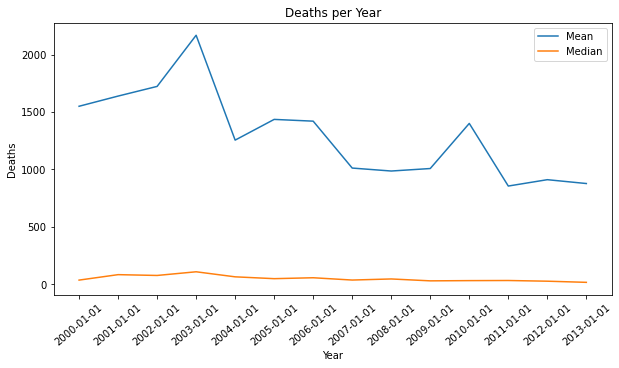

In [4]:
plt.plot(by_year["Deaths"].mean(), label="Mean")
plt.plot(by_year["Deaths"].median(), label="Median")
plt.title("Deaths per Year")
plt.xlabel("Year")
plt.xticks(rotation = 40)
plt.ylabel("Deaths")
plt.legend()
plt.show()

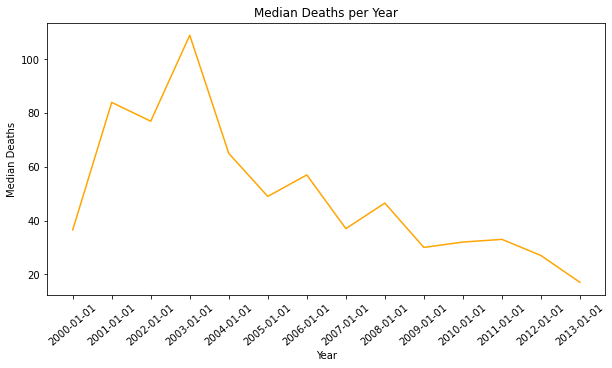

In [5]:
plt.plot(by_year["Deaths"].median(), color="orange")
plt.title("Median Deaths per Year")
plt.xlabel("Year")
plt.xticks(rotation = 40)
plt.ylabel("Median Deaths")
plt.show()

We see that over the past 13 years, malaria cases globally have decreased. Therefore, the whole world as a whole is making great strides in reducing malaria deaths. Average deaths seem to have reached a platau starting in 2011. Significant reduction in median deaths occured between 2003 and 2004. After 2004, the number of deaths due to malaria have not decreased by much.

As we expected, the average is much higher compared to the median malaria deaths. Therefore, we are expecting that certain regions, or perhaps countries, in the world that have a much higher burden of malaria. We decided to explore the world regions to determine if any pattern emerges regarding malaria deaths.

In [6]:
by_region = malaria_df.groupby(["Region","Year"])

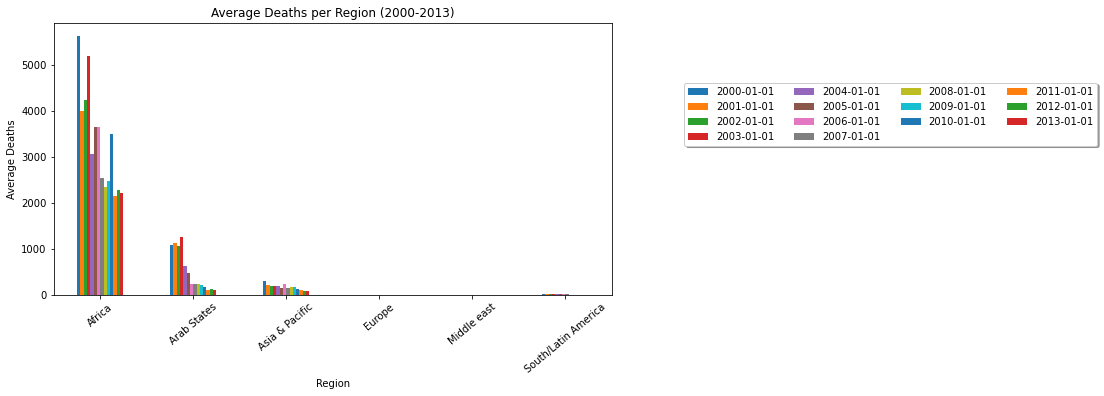

In [7]:
by_region.mean()["Deaths"].unstack().plot(kind="bar")
plt.title("Average Deaths per Region (2000-2013)")
plt.xlabel("Region")
plt.xticks(rotation=40)
plt.ylabel("Average Deaths")
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.8), shadow=True, ncol=4)
plt.show()

In our prior research about malaria, we expected that Africa would have the most deaths due to malaria. We expected that either South/Latin America or Asia & Pacific region would have the second number of deaths. However, we were surprised that Arab States had many more malaria deaths compared to the other regions.

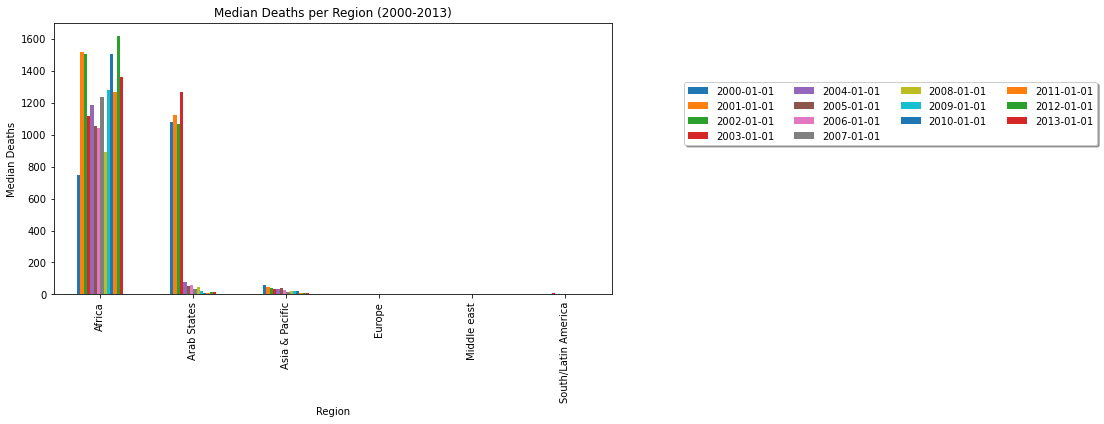

In [8]:
by_region.median()["Deaths"].unstack().plot(kind="bar")
plt.title("Median Deaths per Region (2000-2013)")
plt.xlabel("Region")
plt.xticks()
plt.ylabel("Median Deaths")
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.8), shadow=True, ncol=4)
plt.show()

Looking at the median deaths per region, we found that median malaria cases in Africa had not really changed much since 2000. This was surprising, since the prior graph indicated a decrease in average malaria deaths. What this may mean is that malaria cases in most countries in Africa, other than those that have unusually high number of deaths, have stabilized or reached an equilibrium point. This supports the idea that malaria is endemic in Africa, and that perhaps more intervention is needed to continue reducing malaria deaths throughout Africa.

We were surprised by the massive drop in median malaria deaths in the Arab states between 2003-2004. We would like to explore the cause of this further. In the Asia & Pacific region, median deaths due to malaria have been decreasing consistently suggesting that there have been improvements in malaria control in that region.

We then decided to explore the regions of "Africa" separately.

##### Africa

In [9]:
africa = malaria_df[malaria_df["Region"]=="Africa"]

We wanted to explore the current situation of all African Countries in the latest year data was collected.

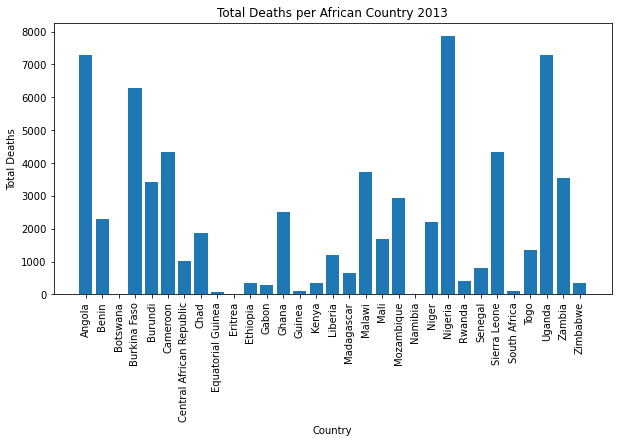

In [10]:
africa_2013 = africa.loc["2013-01-01"]
plt.bar(africa_2013["Country"], africa_2013["Deaths"])
plt.title("Total Deaths per African Country 2013")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Total Deaths")
plt.show()

We found that Angola had the highest deaths reported in 2017. We wanted to compare the latest year with the earliest year data was collected.

In [15]:
africa_2000 = africa[africa["Year"]==2000]
plt.bar(africa_2000["Country"], africa_2000["Deaths"])
plt.title("Total Deaths per African Country 2000")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Total Deaths")
plt.show()

KeyError: 'Year'

We find that there have been great reduction in deaths in Kenya over the past 13 years data was collected. Angola had the second highest malaria deaths in 2000, but is now the highest in 2017. We tried to find out more of the trend in cases.

In [16]:
angola = africa[africa["Country"]=="Angola"]
kenya = africa[africa["Country"]=="Kenya"]
plt.plot(angola["Year"], angola["Deaths"], label="Angola")
plt.plot(kenya["Year"], kenya["Deaths"], label="Kenya")
plt.title("Deaths per Year")
plt.xlabel("Year")
plt.xticks(rotation = 40)
plt.ylabel("Deaths")
plt.legend()
plt.show()

KeyError: 'Year'

The graph shows that the overall trend in Kenya is down. Data was not collected between 2006 and 2010 in Kenya. We will look into how and are aware of this for analysis. However, it seems like Angola's trend in malaria deaths have not changed significantly over time. We do find that in recent years, malaria deaths in Angola has increased. We explored the trends in malaria incidence next.

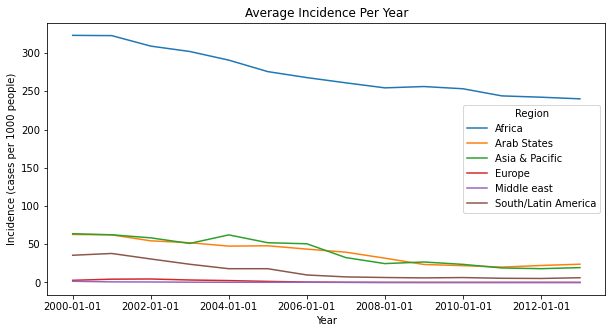

In [13]:
year_region = malaria_df.groupby(["Year","Region"])
year_region["Incidence"].mean().unstack().plot()
plt.title("Average Incidence Per Year")
plt.xlabel("Year")
plt.ylabel("Incidence (cases per 1000 people)")
plt.show()

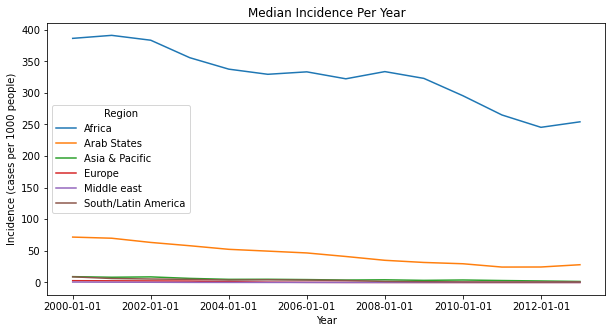

In [14]:
year_region = malaria_df.groupby(["Year","Region"])
year_region["Incidence"].median().unstack().plot()
plt.title("Median Incidence Per Year")
plt.xlabel("Year")
plt.ylabel("Incidence (cases per 1000 people)")
plt.show()

Malaria incidence in Europe, the Middle East, and South/Latin America seems to be close to zero, so we can assume that malaria does not pose a huge problem in these areas. Africa is still hit the hardest, followed by the Arab States, and then Asia & Pacific regions. Starting around 2007, we seem to have hit a plataeu in incidence and that incidence in Africa had slowly risen up since 2010. We decided to explore the correlations between variables in our dataset. 

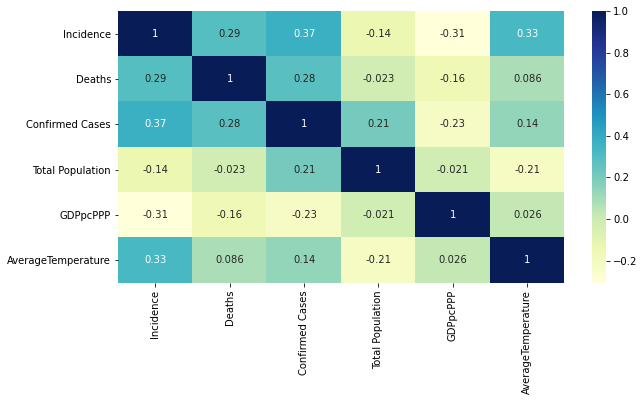

In [17]:
malaria_corr_matrix = malaria_df.corr()
sns.heatmap(malaria_corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

Surprisingly, there are no strong correlations between the quantitative variables in our dataset. We expected that the number of confirmed cases and incidence would have a positive correlation, but the relationship seems weak. We expected that the more confirmed cases there were, the more deaths there were. However, the correlation also seemed weak.

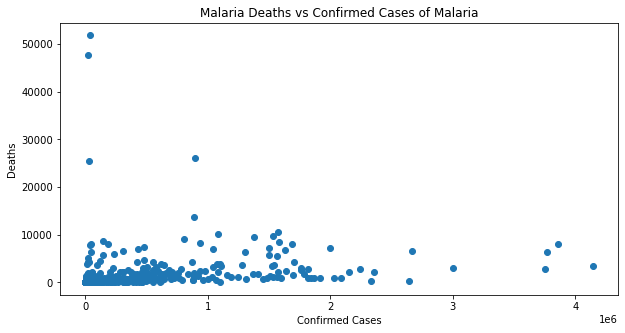

In [18]:
plt.scatter(malaria_df["Confirmed Cases"], malaria_df['Deaths'])
plt.title("Malaria Deaths vs Confirmed Cases of Malaria")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.show()

After graphing malaria deaths to confirmed cases, we could see why the correlation coefficient was weak. In the future, we will explore whether this might be due to the inclusion of Africa, which has way more cases compared to the rest of the world. It might be the case that we need to analyze Africa separately.

In the future, we will narrow down our focus further and connect other datasets that use sociodemographic factors and temperature to explore why some regions or countries are experiencing high rates of malaria.

### Analysis 1: Multivariable Regression of Temperature, GDP and Malaria Incidence

In [19]:
#Generating dummy variables for regions
subset_2013 = malaria_df.loc["2013-01-01"].copy()
subset_2013["Is Asia & Pacific"] = pd.get_dummies(subset_2013["Region"])["Asia & Pacific"]
subset_2013["Is Arab States"] = pd.get_dummies(subset_2013["Region"])["Arab States"]
subset_2013["Is Africa"] = pd.get_dummies(subset_2013["Region"])["Africa"]
subset_2013["Is South/Latin America"] = pd.get_dummies(subset_2013["Region"])["South/Latin America"]
subset_2013["Is Europe"] = pd.get_dummies(subset_2013["Region"])["Europe"]
subset_2013["Is Middle east"] = pd.get_dummies(subset_2013["Region"])["Middle east"]

##### Our multivariate linear regression model

In [20]:
incidence_model_vars = ["Is Asia & Pacific", "Is Arab States", "Is Africa",
                        "Is South/Latin America", "Is Europe", "Is Middle east",
                        "AverageTemperature", "GDPpcPPP"]

subset_2013 = subset_2013.dropna(subset = incidence_model_vars).copy() # making sure there are no NA values

incidence_model_2013 = LinearRegression()
incidence_model_2013.fit(subset_2013[incidence_model_vars], subset_2013["Incidence"])
incidence_model_2013_coeff = incidence_model_2013.coef_[:]

In [21]:
for i in range(len(incidence_model_2013_coeff)):
    print('For', incidence_model_vars[i], 'variable, the regression coefficient is: {:.2f}'.format(incidence_model_2013_coeff[i]))

For Is Asia & Pacific variable, the regression coefficient is: -26.35
For Is Arab States variable, the regression coefficient is: -68.27
For Is Africa variable, the regression coefficient is: 167.87
For Is South/Latin America variable, the regression coefficient is: -61.45
For Is Europe variable, the regression coefficient is: 35.38
For Is Middle east variable, the regression coefficient is: -47.18
For AverageTemperature variable, the regression coefficient is: 7.89
For GDPpcPPP variable, the regression coefficient is: -0.00


##### Using pooled data rather than just the 2013 year.

In [22]:
malaria_df_dropna = malaria_df.copy()
malaria_df_dropna["Is Asia & Pacific"] = pd.get_dummies(malaria_df_dropna["Region"])["Asia & Pacific"]
malaria_df_dropna["Is Arab States"] = pd.get_dummies(malaria_df_dropna["Region"])["Arab States"]
malaria_df_dropna["Is Africa"] = pd.get_dummies(malaria_df_dropna["Region"])["Africa"]
malaria_df_dropna["Is South/Latin America"] = pd.get_dummies(malaria_df_dropna["Region"])["South/Latin America"]
malaria_df_dropna["Is Europe"] = pd.get_dummies(malaria_df_dropna["Region"])["Europe"]
malaria_df_dropna["Is Middle east"] = pd.get_dummies(malaria_df_dropna["Region"])["Middle east"]
malaria_df_dropna = malaria_df_dropna.dropna(subset=incidence_model_vars).copy() # making sure there are no NA values

incidence_model_pooled = LinearRegression()
incidence_model_pooled.fit(malaria_df_dropna[incidence_model_vars], malaria_df_dropna["Incidence"])
incidence_model_pooled_coeff = incidence_model_pooled.coef_[:]

In [23]:
for i in range(len(incidence_model_pooled_coeff)):
    print('For', incidence_model_vars[i], 'variable, the regression coefficient is: {:.2f}'.format(incidence_model_pooled_coeff[i]))

For Is Asia & Pacific variable, the regression coefficient is: -24.84
For Is Arab States variable, the regression coefficient is: -69.34
For Is Africa variable, the regression coefficient is: 168.21
For Is South/Latin America variable, the regression coefficient is: -74.09
For Is Europe variable, the regression coefficient is: 26.72
For Is Middle east variable, the regression coefficient is: -26.67
For AverageTemperature variable, the regression coefficient is: 8.26
For GDPpcPPP variable, the regression coefficient is: -0.00


### Analysis 2: K-Means Clustering

In [47]:
from sklearn.cluster import KMeans

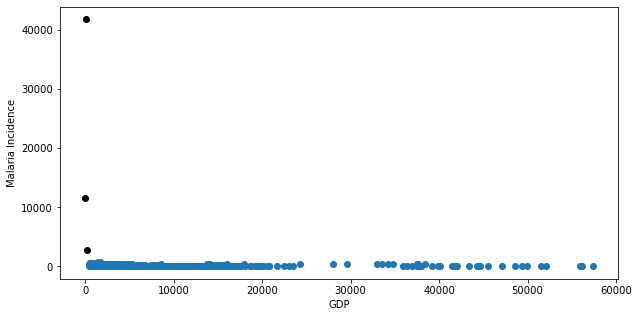

In [59]:
twoCols = malaria_df[["GDPpcPPP", "GDPpcPPP"]]
twoCols = twoCols.dropna(axis=0)
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit(twoCols)

centers = kmeans.cluster_centers_
plt.scatter(malaria_df["GDPpcPPP"], malaria_df["Incidence"])
plt.scatter(centers[:, 0], centers[:, 1], c='black')
plt.xlabel("GDP")
plt.ylabel("Malaria Incidence")
plt.show()

The k-means analysis of countries based on malaria incidence and GDP did not produce any insightful information. We expected the plot of the relationship between GDP and malaria incidence to be linear, however the plot shows significant clustering of low GDP countries with some having high malaria incidence.

## Evaluation of Significance

#### 1. Differences in malaria cases per world region

## Interpretation and Conclusions

The exploratory analysis revealed a number of trends. First, malaria incidence has been declining worldwide since 2003. Africa has the highest number of deaths among regions, followed by Arab states and then Asia & Pacific. The other regions have almost none. The heatmap shows few noteworthy relationships, however it is worth noting that there is a moderate correlation of 0.14 between number of confirmed cases and average temperature. Given that malaria is transmitted most easily in warm climates, we are actually surprised that this relationship is not stronger.

Our first analysis, the multivariable regression, revealed a number of relationships relating to malaria incidence. The regression coefficient of the AverageTemperature variable and incidence is 7.89, meaning that for every degree increase in temperature, the incidence of malaria increases by 7.89 on average. Interestingly, the coefficient with GDP and incidence is 0, meaning that the model predicts no relationship between GDP and incidence. This lack of relationship is reflected in our second analysis, where the k-means clustering demonstrated no clear difference between countries regarding malaria incidence based on GDP.

In conclusion, we found a moderate, positive relationship between average country temperature over a year and malaria incidence. Surprisingly, this was a greater predictor of malaria incidence than GDP. These findings indicate that the trend of rising global temperatures may be associated with higher levels of malaria incidence. Better treatment and prevention of the disease may reverse this trend, and it is uplifting to note that malaria has significantly declined since 2003.

## Limitations

One limitation is that the most recent data available for GDP is in 2013, so our dataset could only include records as recent as that year.

## Source Code

Datasets and codebooks are available [here](https://github.com/mcuadera/info_2950_malaria_project).

## Acknowledgements

We would like to acknowledge the World Health Organization for providing detailed data on malaria incidence worldwide. Allowing this data to be accessed by all allows anyone to assist in the effort to curb the spread of this disease. We would also like to thank our Section TA Heather Ginsburg for her clear lectures and guidance on this project.

## Appendix: Data Cleaning Description

## Questions for Reviewers

Is there a way we can manipulate our k-means analysis to generate more revealing information? The TA told us that k-means can still provide insights even when we have continuous, numerical data and not categorical data, but we're confused as to how to interpret this kind of analysis. Do you think k-means applies at all to what we are trying to find?

For the TA: what grade would we get on this project if we submitted it as is?